### Handling Boundaries

All the notebooks that came before this one used perfectly periodic signals, and so we didn't have to deal with the boundaries. However, the choices made in handling boundaries can be important in our analysis. 

We have few choices: 
- Constants outside boundary
    - zero
    - extend
- Mirroring to artificially create periodicity



In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import funcs

In [52]:
L = 1000 # let's say units of m 
N = 512

alpha = 3
f, x, dx = funcs.random_phase_power_law_function(alpha, N, L)

f_ps, k = funcs.power_spectrum(f, dx)

In [74]:
x.max()

998.046875

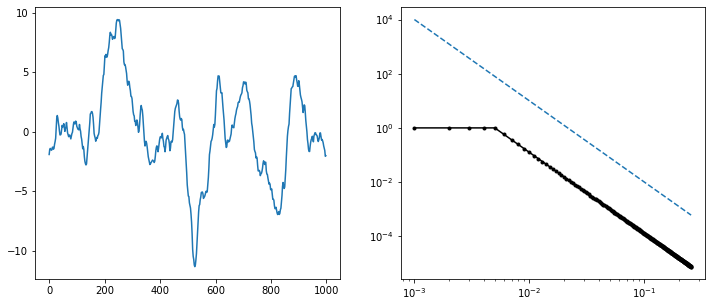

In [53]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.plot(x, f)

plt.subplot(122)
plt.plot(k, f_ps, 'k.-')
plt.plot(k, 1e-5*k**-alpha, '--')
plt.xscale('log')
plt.yscale('log')

#plt.ylim([5e-3, 2])

In [85]:
# add an exponentially decaying component
# Sort of representative of how temperature decays with depth in ocean

L_decay = 200
A = 60


f_exp = A * np.exp(-x/ L_decay)
f_exp_2 = A * np.exp(-np.abs(x - x.max()/2)/ L_decay)

fexp_ps, k = funcs.power_spectrum(f_exp, dx)
fexp2_ps, k = funcs.power_spectrum(f_exp_2, dx)


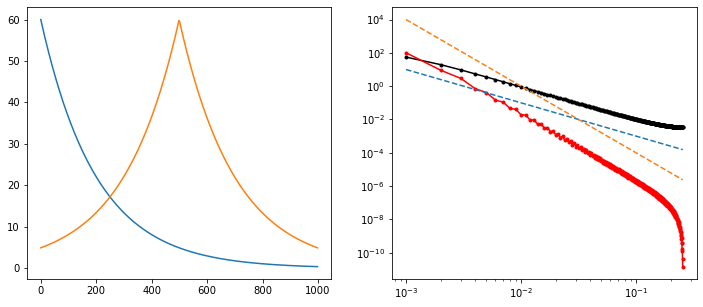

In [86]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.plot(x, f_exp)
plt.plot(x, f_exp_2)

plt.subplot(122)
plt.plot(k, fexp_ps, 'k.-')
plt.plot(k, fexp2_ps, 'r.-')
plt.plot(k, 1e-5*k**-2, '--')
plt.plot(k, 1e-8*k**-4, '--')
plt.xscale('log')
plt.yscale('log')

#plt.ylim([5e-3, 2])

An exponential function results in a -2 spectrum, but this is largely a result of step change in value due to assuming periodicity. When we mirror this function we find (as we might expect) aa much steeper spectrum -4 (as things are very smooth).


In [87]:
f_comb = f + f_exp_2
fcomb_ps, k = funcs.power_spectrum(f_comb, dx)

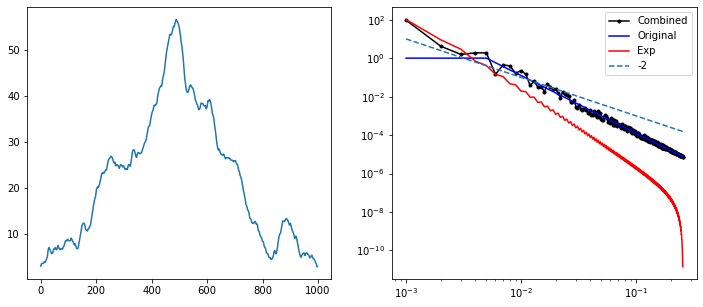

In [88]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.plot(x, f_comb)

plt.subplot(122)
plt.plot(k, fcomb_ps, 'k.-', label='Combined')
plt.plot(k, f_ps, 'b-', label ='Original')
plt.plot(k, fexp2_ps, 'r-', label = 'Exp')
plt.plot(k, 1e-5*k**-2, '--', label='-2')
plt.legend()
plt.xscale('log')
plt.yscale('log')

#plt.ylim([5e-3, 2])

So far the results are:
- Sharp discontinuity between surface and bottom (if use regular fft, which assumes peridocity) causes problem with spectral analysis. 
- Mirroring seems to do a good job, and at small scales we are able to recover the spectra. Without mirroring spectra steeper than -2 are hard to recover, as that is the signal of the step change.
- There is some noise that has started to come in. If noise starts to become problematic then we can start to think about spectral estimation. 

We can play around more with this, like trying windowing and filtering also. 
Also add mixed layer. 